### 4.2 손실함수
- 평균 제곱 오차 , 교차 엔트로피 오차
- Mean Squared Error, Cross Entropy Error
- MSE, CEE

### 4.2.1 평균 제곱 오차,  MeanSquaredError, MSE

$$MSE = {1 \over 2} \sum(y_k - t_k)^2$$

In [1]:
def mean_squared_error(y, t):
    return 0.5*np.sum((y-t)**2)

### 4.2.2 교차 엔트로피 오차, CrossEntropyError, CEE

$$CEE = -\sum{t_k\log y_k}$$

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t + np.log(y + delta))


### 4.2.3 미니배치학습

In [3]:
from mnist import load_mnist

In [4]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [5]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


- 배치 선정, np.random.choixe(train_size, batch_size)

In [6]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
len(x_batch)

10

### 4.2.4 교차 엔트로피 오차 구하기

In [8]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

### 4.3 수치 미분
### 4.3.1 미분

In [9]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / h

In [10]:
def test(x):
    return x

In [11]:
numerical_diff(test, 2)

1.0000000000021103

In [12]:
1e-4

0.0001

- 수치 미분은 실제 미분값과 비교해 오차가 생길 수 밖에 없다.
- 오차를 줄이기 위한 구현 방법

In [13]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [14]:
numerical_diff(test, 2)

1.000000000001

### 4.3.2 수치 미분의 예

In [17]:
%matplotlib inline
def function_1(x):
    return 0.01*x**2 + 0.1*x

$$ f(x) = 0.01x^2 + 0.1x $$

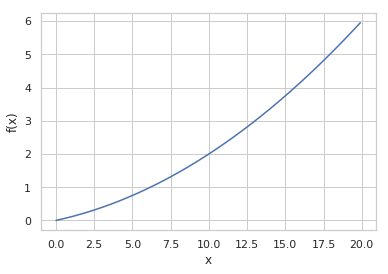

In [19]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [20]:
numerical_diff(function_1, 5)

0.1999999999990898

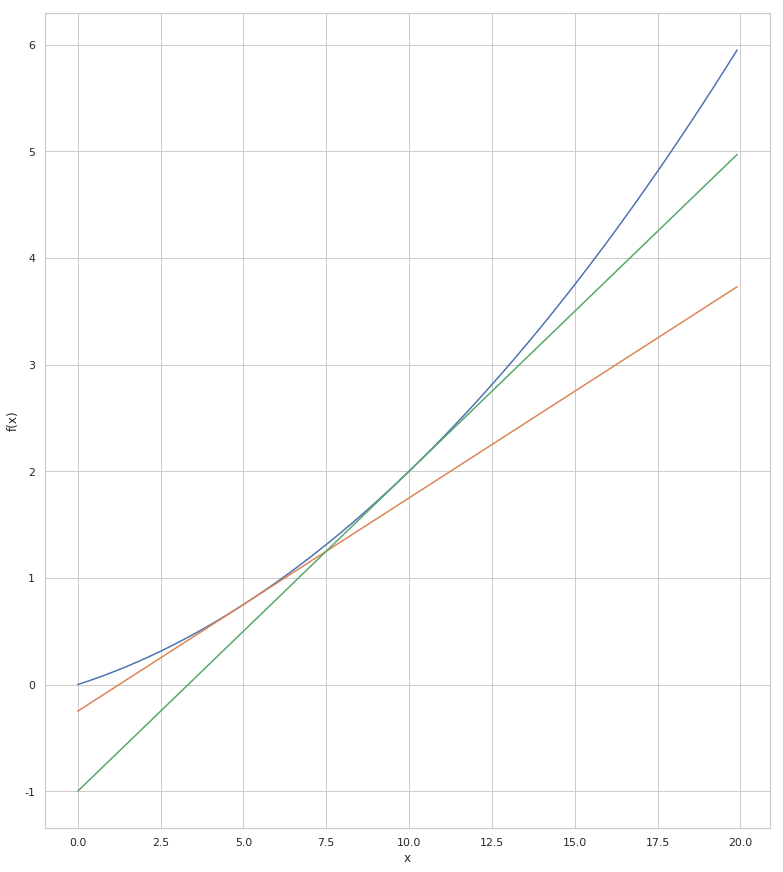

In [24]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
gradient_5 = numerical_diff(function_1, 5)*(x - 5) + function_1(5)
gradient_10 = numerical_diff(function_1, 10)*(x - 10) + function_1(10)
plt.figure(figsize=(13, 15))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.plot(x, gradient_5)
plt.plot(x, gradient_10)
plt.show()

### 4.3.3 편미분
$$ f(x_0, x_1) = {x_0}^2 + {x_1}^2 $$

In [ ]:
def function_2(x):
    return x[0]**2 + x[1]**2
